In [1]:
from super_gradients.training import models
import cv2
from futstats.annotations.anns import Detection
import matplotlib.pyplot as plt
from super_gradients.training.processing import DetectionCenterPadding, StandardizeImage, NormalizeImage, ImagePermute, ComposeProcessing, DetectionLongestMaxSizeRescale

[2023-11-27 22:57:05] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /home/fer/sg_logs/console.log


[2023-11-27 22:57:05] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-11-27 22:57:08] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-11-27 22:57:08] WARNING - export.py - Failed to import pytorch_quantization
[2023-11-27 22:57:08] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


In [2]:
import torch
print(torch.__version__)
torch.cuda.is_available()

True

In [3]:
%load_ext autoreload
%autoreload 2

2.0.1+cu117


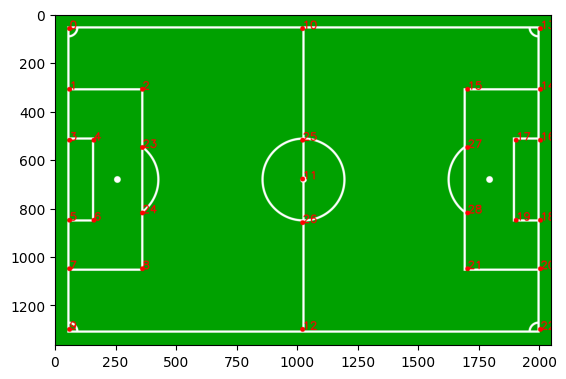

In [4]:
field = cv2.cvtColor(cv2.imread('../images/field_2d.jpg'), cv2.COLOR_BGR2RGB)

# TODO REMODELAR

POINT2POINT2D = {
    "0" : (60, 60),
    "1" : (60,310),
    "2" : (360,310),
    "3" : (60,520),
    "4" : (160,520),
    "5" : (60,850),
    "6" : (160,850),
    "7" : (60,1050),
    "8" : (360,1050),
    "9" : (60,1300),
    "10": (1020,60),
    "11" : (1020,680),
    "12" : (1020,1300),
    "13" : (2000,60),
    "14" : (2000,310),
    "15" : (1700,310),
    "16" : (2000,520),
    "17" : (1900,520),
    "18" : (2000,850),
    "19" : (1900,850),
    "20" : (2000,1050),
    "21" : (1700,1050),
    "22" : (2000,1300),
    "23" : (360,550),
    "24" : (360,820),
    "25" : (1020,520),
    "26" : (1020,860),
    "27" : (1700,550),
    "28" : (1700,820),
}



NUM_CLASES = len(POINT2POINT2D)


check = field.copy()

for id_, coord in POINT2POINT2D.items():
    check = cv2.circle(check, coord, 10, (255, 0, 0), -1)
    check = cv2.putText(check, id_, coord, cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0),3)

plt.imshow(check)

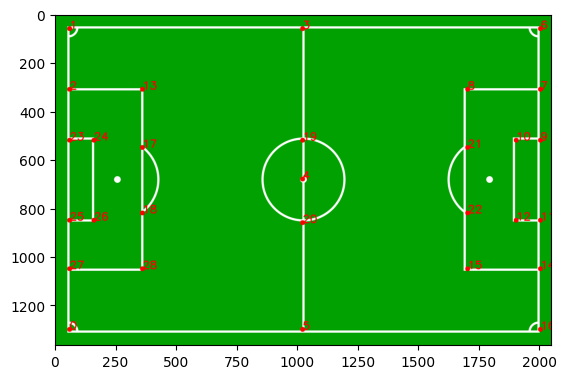

In [5]:

POINT2POINT2D = {
    "0" : (60,1300),
    "1" : (60, 60),
    "2" : (60,310),
    "3": (1020,60),
    "4" : (1020,680),
    "5" : (1020,1300),
    "6" : (2000,60),
    "7" : (2000,310),
    "8" : (1700,310),
    "9" : (2000,520),
    "10" : (1900,520),
    "11" : (2000,850),
    "12" : (1900,850),
    "13" : (360,310),
    "14" : (2000,1050),
    "15" : (1700,1050),
    "16" : (2000,1300),
    "17" : (360,550),
    "18" : (360,820),
    "19" : (1020,520),
    "20" : (1020,860),
    "21" : (1700,550),
    "22" : (1700,820),
    "23" : (60,520),
    "24" : (160,520),
    "25" : (60,850),
    "26" : (160,850),
    "27" : (60,1050),
    "28" : (360,1050),

}


check = field.copy()

for id_, coord in POINT2POINT2D.items():
    check = cv2.circle(check, coord, 10, (255, 0, 0), -1)
    check = cv2.putText(check, id_, coord, cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0),3)

plt.imshow(check)

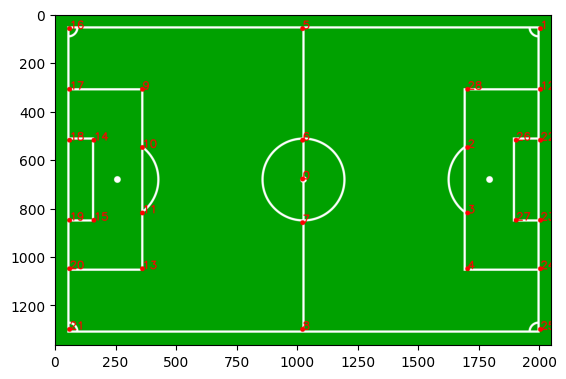

In [6]:
POINT2POINT2D = {
     "0" : (1020,680),
    "1" : (2000,60),
    "2" : (1700,550),
    "3" : (1700,820),
    "4" : (1700,1050),
    "5": (1020,60),
    "6" : (1020,520),
    "7" : (1020,860),
    "8" : (1020,1300),
    "9" : (360,310),
    "10" : (360,550),
    "11" : (360,820),
    "12" : (2000,310),
    "13" : (360,1050),
    "14" : (160,520),
    "15" : (160,850),
    "16" : (60, 60),
    "17" : (60,310),
    "18" : (60,520),
    "19" : (60,850),
    "20" : (60,1050),
    "21" : (60,1300),
    "22" : (2000,520),
    "23" : (2000,850),
    "24" : (2000,1050),
    "25" : (2000,1300),
    "26" : (1900,520),
    "27" : (1900,850),
    "28" : (1700,310),




}




check = field.copy()

for id_, coord in POINT2POINT2D.items():
    check = cv2.circle(check, coord, 10, (255, 0, 0), -1)
    check = cv2.putText(check, id_, coord, cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0),3)

plt.imshow(check)

In [7]:
cktp_path =  "./checkpoints/FIELD_KEYPOINTS_COCO_DATA_1/ckpt_best.pth"
cktp_path = "./checkpoints/ckpt_best_nov.pth"
cktp_path = "./checkpoints/ckpt_best_nov_new.pth"


model = models.get("yolo_nas_s",
                num_classes=NUM_CLASES,
                checkpoint_path=cktp_path)


# model.set_dataset_processing_params(
#     image_processor = ComposeProcessing(
#     [
#         DetectionLongestMaxSizeRescale(output_shape=(636, 636)),
#         DetectionCenterPadding(output_shape=(640, 640), pad_value=114),
#         StandardizeImage(max_value=255.0),
#         ImagePermute(permutation=(2, 0, 1)),
#     ]
# )
# )

[2023-11-27 22:57:10] INFO - checkpoint_utils.py - Successfully loaded model weights from ./checkpoints/ckpt_best_nov_new.pth EMA checkpoint.


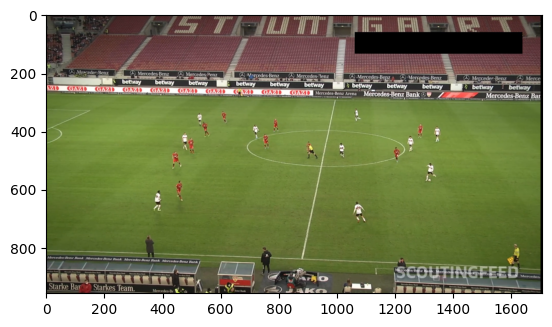

In [8]:
img = cv2.cvtColor(cv2.imread('../images/frame.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [9]:
results = list(model.predict(img, conf=0.3))[0]
detections = Detection.from_yoloNas(pred=results)
print(len(detections))

[2023-11-27 22:57:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


In [10]:
detections

[Detection(rect=Rect(x=955.765625, y=376.18756103515625, width=31.99139404296875, height=36.684722900390625), class_id=6, class_name='6', confidence=0.8959961533546448, tracker_id=None, color=None),
 Detection(rect=Rect(x=131.7207794189453, y=313.9242858886719, width=24.571365356445312, height=27.269134521484375), class_id=9, class_name='9', confidence=0.8462729454040527, tracker_id=None, color=None),
 Detection(rect=Rect(x=930.363037109375, y=499.2274475097656, width=34.3829345703125, height=38.765106201171875), class_id=7, class_name='7', confidence=0.8304476141929626, tracker_id=None, color=None),
 Detection(rect=Rect(x=8.955202102661133, y=367.4396667480469, width=26.05869483947754, height=29.2830810546875), class_id=10, class_name='10', confidence=0.7030295133590698, tracker_id=None, color=None),
 Detection(rect=Rect(x=984.2739868164062, y=280.9730224609375, width=18.9283447265625, height=19.672088623046875), class_id=5, class_name='5', confidence=0.6188438534736633, tracker_id=No

7


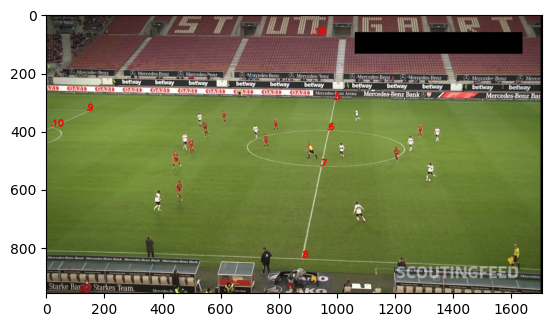

In [11]:

points = img.copy()

for detection in detections:
    x2, y2 = detection.rect.bottom_right.int_xy_tuple
    x1, y1 = detection.rect.top_left.int_xy_tuple
    # get the center of the box
    center = (int((x1 + x2) / 2),int((y1 + y2) / 2))
    points = cv2.circle(points, center, 3, (255, 0, 0), -1)
    points = cv2.putText(points, str(detection.class_id), center, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0),3)


plt.imshow(points)

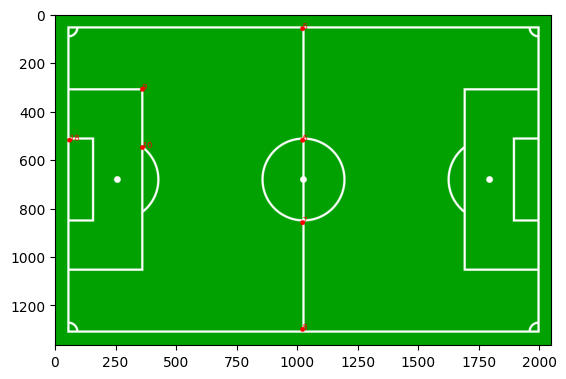

In [12]:
src_points = []
dst_points = []


anns_2d = field.copy()


for detection in detections:
    x2, y2 = detection.rect.bottom_right.int_xy_tuple
    x1, y1 = detection.rect.top_left.int_xy_tuple
    center = (int((x1 + x2) / 2),int((y1 + y2) / 2))
    points_2d = POINT2POINT2D[str(detection.class_id)]
    src_points.append(center)
    dst_points.append(points_2d)
    anns_2d = cv2.circle(anns_2d,points_2d, 10, (255, 0, 0), -1)
    anns_2d = cv2.putText(anns_2d, str(detection.class_id), points_2d, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0),2)



plt.imshow(anns_2d)

# ball

In [13]:
import numpy as np
M, _ = cv2.findHomography(np.array(src_points), np.array(dst_points), cv2.RANSAC, 5)


In [14]:
M

array([[ 8.38990323e+00,  2.77681577e+01, -6.85220099e+03],
       [-4.47054046e-01,  5.44568711e+01, -1.47862598e+04],
       [ 8.86406424e-04,  2.57302521e-02,  1.00000000e+00]])

In [15]:
ball = (100,100)

ball_pt = np.array([ball], np.float32).reshape(-1, 1, 2)
ball_pt_2d = cv2.perspectiveTransform(ball_pt, M)
ball_pt_2d = ball_pt_2d.astype(int)

In [16]:
ball_pt

array([[[100., 100.]]], dtype=float32)

# tracking

In [25]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from futstats.tracking.bytrack_utils import (
    BYTETrackerArgs,
    detections2boxes,
    match_detections_with_tracks,
)


In [27]:
byte_tracker = BYTETracker(BYTETrackerArgs())
field_model = models.get(
    "yolo_nas_s",
    num_classes=29,
    checkpoint_path="/home/fer/Escritorio/futstatistics/futstats/models/ckpt_best_nov_new.pth",
)

[2023-11-27 23:01:49] INFO - checkpoint_utils.py - Successfully loaded model weights from /home/fer/Escritorio/futstatistics/futstats/models/ckpt_best_nov_new.pth EMA checkpoint.


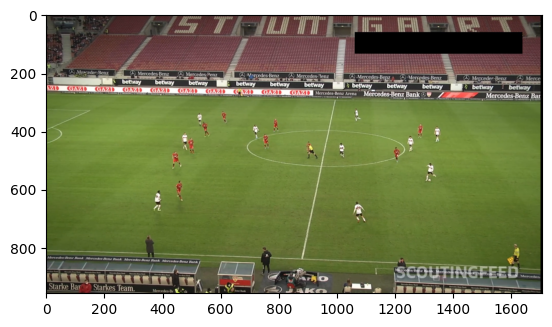

In [29]:
plt.imshow(img)

In [30]:
tracks = byte_tracker.update(
    output_results=detections2boxes(detections=detections),
    img_info=img.shape,
    img_size=img.shape,
)

In [31]:
tracks

[OT_1_(1-1), OT_2_(1-1), OT_3_(1-1), OT_4_(1-1), OT_5_(1-1), OT_6_(1-1)]

In [33]:
tracked_detections = match_detections_with_tracks(
    detections=detections, tracks=tracks
)
tracked_detections

[Detection(rect=Rect(x=955.765625, y=376.18756103515625, width=31.99139404296875, height=36.684722900390625), class_id=6, class_name='6', confidence=0.8959961533546448, tracker_id=1, color=None),
 Detection(rect=Rect(x=131.7207794189453, y=313.9242858886719, width=24.571365356445312, height=27.269134521484375), class_id=9, class_name='9', confidence=0.8462729454040527, tracker_id=2, color=None),
 Detection(rect=Rect(x=930.363037109375, y=499.2274475097656, width=34.3829345703125, height=38.765106201171875), class_id=7, class_name='7', confidence=0.8304476141929626, tracker_id=3, color=None),
 Detection(rect=Rect(x=8.955202102661133, y=367.4396667480469, width=26.05869483947754, height=29.2830810546875), class_id=10, class_name='10', confidence=0.7030295133590698, tracker_id=4, color=None),
 Detection(rect=Rect(x=984.2739868164062, y=280.9730224609375, width=18.9283447265625, height=19.672088623046875), class_id=5, class_name='5', confidence=0.6188438534736633, tracker_id=5, color=None)

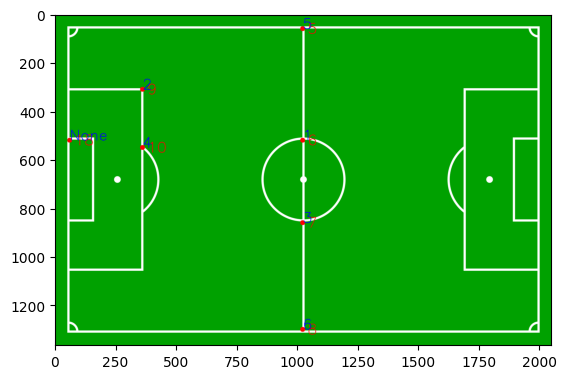

In [41]:
src_points = []
dst_points = []


anns_2d = field.copy()


for detection in detections:
    x2, y2 = detection.rect.bottom_right.int_xy_tuple
    x1, y1 = detection.rect.top_left.int_xy_tuple
    center = (int((x1 + x2) / 2),int((y1 + y2) / 2))
    points_2d = POINT2POINT2D[str(detection.class_id)]
    src_points.append(center)
    dst_points.append(points_2d)
    anns_2d = cv2.circle(anns_2d,points_2d, 10, (255, 0, 0), -1)
    anns_2d = cv2.putText(anns_2d, str(detection.class_id), (points_2d[0] + 20,points_2d[1] + 20), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0),2)
    anns_2d = cv2.putText(anns_2d, str(detection.tracker_id), points_2d, cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255),2)


plt.imshow(anns_2d)

## KALMAN FILTER

https://machinelearningspace.com/2d-object-tracking-using-kalman-filter/
